<a href="https://colab.research.google.com/github/lkilpela/AI_Machine_Learning_Piscine/blob/main/Medium01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving df.csv to df.csv


In [85]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [6]:
# Read data
df = pd.read_csv("df.csv")
# Display the first few rows
print(df.head())

# Check for missing values
print(df.isnull().sum())

   index     A      B     C     D       E     F      G    H     I  type
0      0  1.67  16.10  4.42  2.32  101.77  0.88  13.31  0.0  0.00     2
1      1  1.67  16.27  4.64  2.79  101.43  0.96  12.74  0.0  0.00     1
2      2  1.67  17.72  4.88  0.55  100.83  0.04  14.40  0.0  0.00     0
3      3  1.68  15.97  4.65  1.56  100.79  0.18  16.27  0.0  0.05     0
4      4  1.67  15.28  2.41  3.53  101.77  0.90  16.14  0.0  0.00     3
            index           A           B           C           D           E  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   106.500000    1.670467   16.089626    3.489813    2.745140  101.711215   
std     61.920648    0.003324    0.979979    1.875170    0.948929    1.084305   
min      0.000000    1.660000   12.880000    0.000000    0.550000   97.730000   
25%     53.250000    1.670000   15.490000    2.752500    2.260000  101.190000   
50%    106.500000    1.670000   15.960000    4.520000    2.580000  101.910000   
7

In [14]:
# Number of rows
n_rows = len(df)
print("Number of rows:", n_rows)

Number of rows: 214


In [16]:
# Column names
column_names = list(df.columns)
print("Colume names: ", column_names)

Colume names:  ['index', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'type']


In [13]:
# Dimensions
dimensions = df.shape
# printing size
print("Size = {}".format(dimensions))

Size = (214, 11)


In [7]:
# Describle your datas
# Summary statistics
print(df.describe())

            index           A           B           C           D           E  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean   106.500000    1.670467   16.089626    3.489813    2.745140  101.711215   
std     61.920648    0.003324    0.979979    1.875170    0.948929    1.084305   
min      0.000000    1.660000   12.880000    0.000000    0.550000   97.730000   
25%     53.250000    1.670000   15.490000    2.752500    2.260000  101.190000   
50%    106.500000    1.670000   15.960000    4.520000    2.580000  101.910000   
75%    159.750000    1.670000   16.592500    4.680000    3.100000  102.325000   
max    213.000000    1.690000   20.860000    5.840000    6.650000  105.570000   

                F           G           H           I        type  
count  214.000000  214.000000  214.000000  214.000000  214.000000  
mean     0.745748   14.330888    0.297710    0.102757    1.542056  
std      0.978743    2.276731    0.845669    0.175548    1.707648 

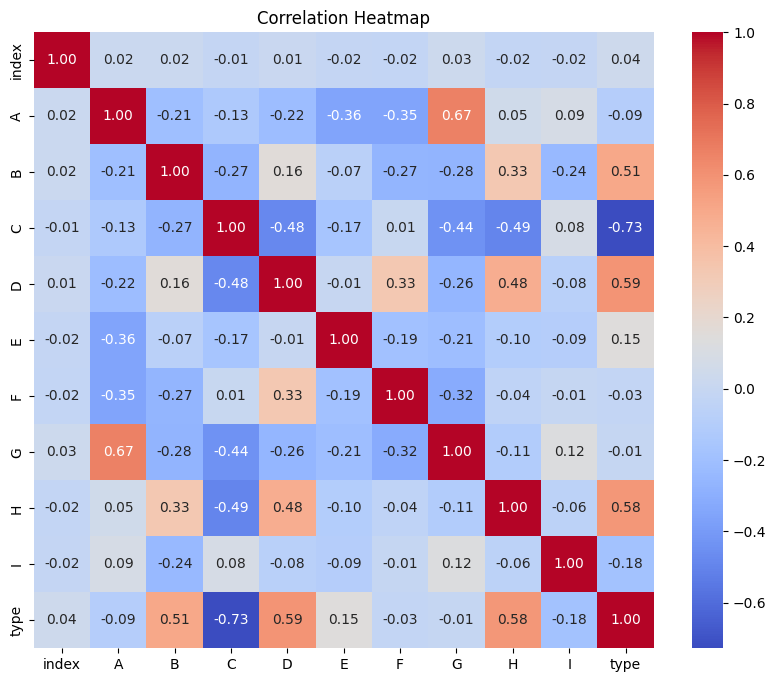

In [22]:
# Calculate the correlation matrix
# form correlation matrix
matrix = df.corr()
#print("Correlation matrix is : ")
#print(matrix)

# Set the figure size (adjust width and height as needed)
plt.figure(figsize=(10, 8))

# Create a heatmap
sns.heatmap(matrix, annot=True, fmt = ".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

It's my turn to create my heat map.

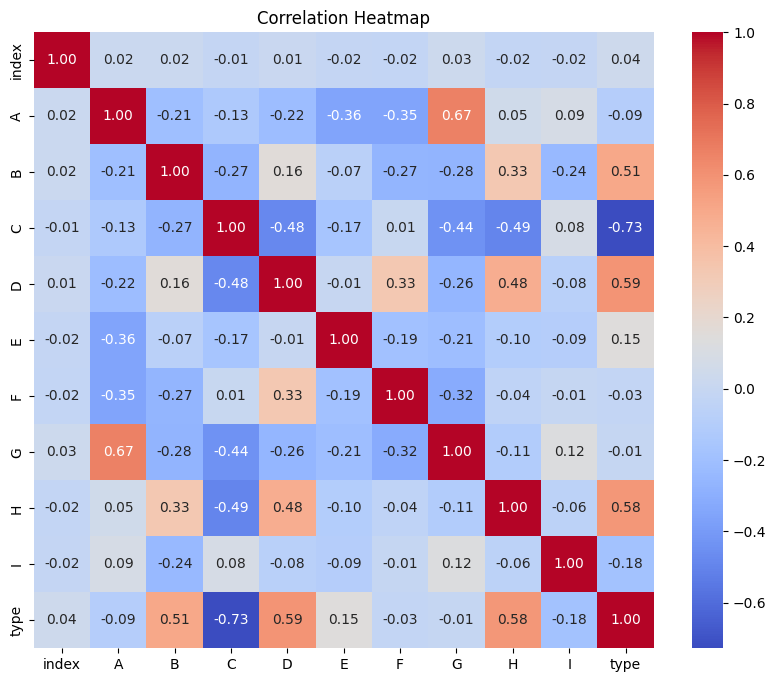

In [36]:
# Drop the 'index' column
df.reset_index(drop=True, inplace=True)
df

,A,B,C,D,E,F,G,H,I,type
0,1.67,16.10,4.42,2.32,101.77,0.88,13.31,0.00,0.00,2
1,1.67,16.27,4.64,2.79,101.43,0.96,12.74,0.00,0.00,1
2,1.67,17.72,4.88,0.55,100.83,0.04,14.40,0.00,0.00,0
3,1.68,15.97,4.65,1.56,100.79,0.18,16.27,0.00,0.05,0
4,1.67,15.28,2.41,3.53,101.77,0.90,16.14,0.00,0.00,3
...,...,...,...,...,...,...,...,...,...,...
209,1.67,17.83,2.86,3.91,98.36,1.14,15.62,0.00,0.00,5
210,1.68,13.22,0.00,1.42,102.31,0.00,23.94,0.00,0.00,1
211,1.67,16.64,0.00,4.83,102.52,0.21,15.06,1.38,0.02,5
212,1.67,16.06,0.00,2.66,101.15,0.50,20.00,0.00,0.00,3


In [100]:
# Training and test data split (70:30)
newdf = df.drop('type', axis=1)
X= newdf
y=df['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50, shuffle=True)

Class distribution in training data
type
1    57
0    49
5    16
2    13
3     9
4     5
Name: count, dtype: int64
Class distribution in test data
type
0    21
1    19
5    13
2     4
4     4
3     4
Name: count, dtype: int64


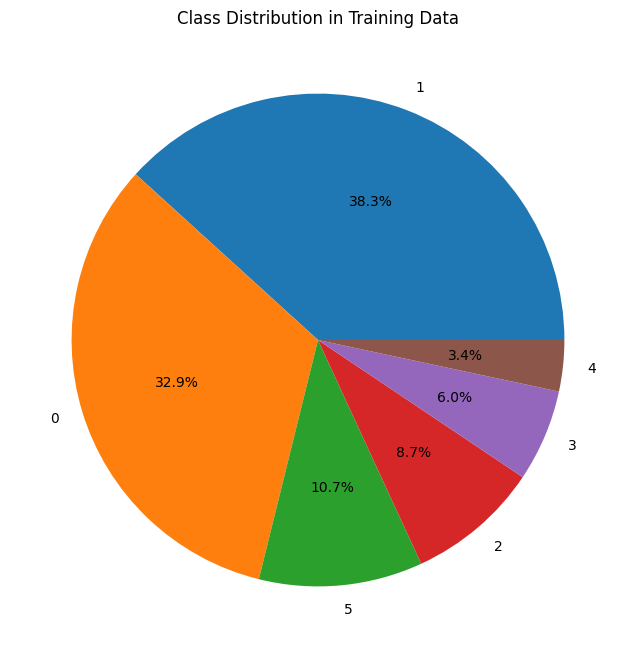

In [101]:
# Display class distribution in training and test data
print("Class distribution in training data")
print(y_train.value_counts())
print("Class distribution in test data")
print(y_test.value_counts())
#Create pie chart
plt.figure(figsize=(8,8))
plt.pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
plt.title('Class Distribution in Training Data')
plt.show()

Now it's my turn to create a pie chart with my class distribution data.

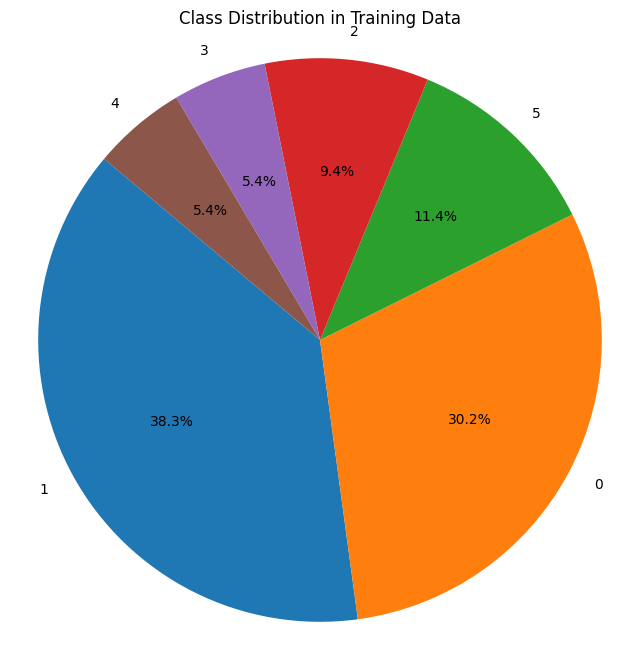

In [102]:
# Multinomial logistic regression model
# Training the model
# Create an instance of LogisticRegression
model = LogisticRegression(max_iter=1000)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
prediction = model.predict(X_test)

# Calculate and print the accuracy score of the model
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.6461538461538462


In [109]:
# Scale the data
scaler = StandardScaler()

# Fit the scaler to the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train) #Fits the scaler to the training data (calculates mean and variance) and transforms it accordingly.
X_test_scaled = scaler.transform(X_test) #ransforms the test data using the same mean and variance calculated from the training data. This ensures consistency in scaling between the two datasets.

In [115]:
# Train the model

model_scaled = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')
model_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, multi_class='multinomial')

In [126]:
# Prediction on the training data
prediction_scaled = model_scaled.predict(X_train_scaled)

# Calculate and print the accuracy score of the model
accuracy_scaled = model_scaled.score(X_train_scaled, y_train)
print("Accuracy:", accuracy_scaled)

cm = confusion_matrix(y_train, prediction_scaled)
print("Confusion maxtrix on training data: \n", cm)

Accuracy: 0.6577181208053692
Confusion maxtrix on training data: 
 [[30 19  0  0  0  0]
 [12 43  0  0  2  0]
 [ 8  5  0  0  0  0]
 [ 0  1  0  7  0  1]
 [ 1  1  0  0  3  0]
 [ 0  1  0  0  0 15]]


In [127]:
# Prediction on the test data
prediction_scaled = model_scaled.predict(X_test_scaled)

# Calculate and print the accuracy score of the model
accuracy_scaled = model_scaled.score(X_test_scaled, y_test)
print("Accuracy:", accuracy_scaled)

cm = confusion_matrix(y_test, prediction_scaled)
print("Confusion maxtrix on test data: \n", cm)

Accuracy: 0.7384615384615385
Confusion maxtrix on test data: 
 [[18  2  1  0  0  0]
 [ 3 16  0  0  0  0]
 [ 4  0  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  2  2]
 [ 0  3  0  0  0 10]]


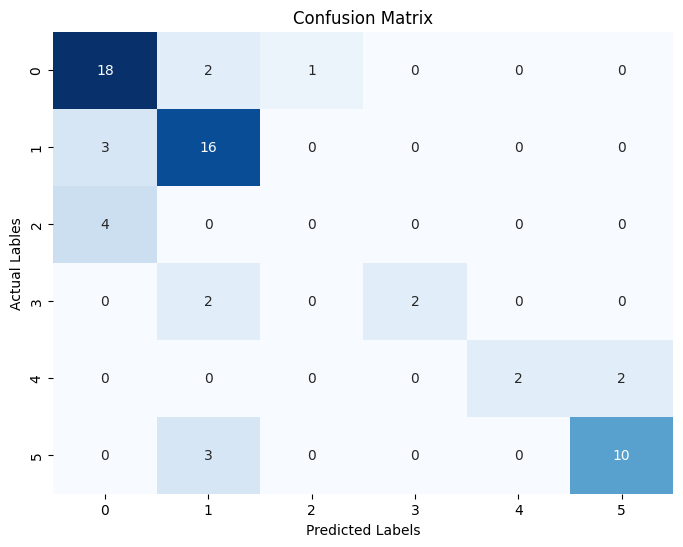

In [128]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, prediction_scaled)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Lables')
plt.title('Confusion Matrix')
plt.show()

It's my turn to create my confusion matrix.

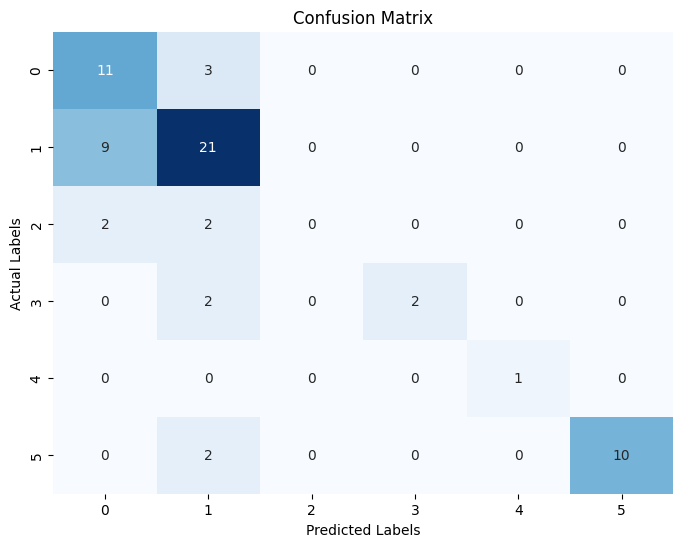